# Proyección de datos 
## Grado en Ingeniería Informática. Universidad de Burgos
**Autor:** Alicia Olivares Gil

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib.pyplot como plot
import pickle as pk
import loadData as ld
from sklearn import manifold 

### Leer datos: 

In [2]:
with open('datos.pdd','rb') as f: 
    datos = pk.load(f) 

print(len(datos))
datos.head()

4722740


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
3949519,2018-10-30 21:20:23,0.0,26.732673,28.712871,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949520,2018-10-30 21:20:23,0.0,25.742574,27.722772,21.782178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949521,2018-10-30 21:20:23,0.0,24.752475,26.732673,21.782178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949522,2018-10-30 21:20:24,0.0,25.742574,27.722772,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949524,2018-10-30 21:20:25,0.0,24.752475,27.722772,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [3]:
with open('datosEstadisticos.pdd','rb') as f: 
    datosEstadisticos = pk.load(f) 

print(len(datosEstadisticos))
datosEstadisticos.head()

4722716


,DateTime,target,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
3949544,2018-10-30 21:20:41,False,0.0,25.108911,28.118812,23.168317,0.0,0.0,0.0,0.0,...,1.309778,1.400211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949543,2018-10-30 21:20:41,False,0.0,24.950495,28.039604,23.128713,0.0,0.0,0.0,0.0,...,1.332042,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949545,2018-10-30 21:20:42,False,0.0,24.831683,28.000000,23.128713,0.0,0.0,0.0,0.0,...,1.356351,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949546,2018-10-30 21:20:43,False,0.0,24.752475,28.000000,23.168317,0.0,0.0,0.0,0.0,...,1.356351,1.400211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949547,2018-10-30 21:20:44,False,0.0,24.594059,27.960396,23.128713,0.0,0.0,0.0,0.0,...,1.379048,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Día del ataque 

In [4]:
inicio =pd.to_datetime('2018-11-10')
fin = pd.to_datetime('2018-11-11')

datosAtaque = datos.loc[datos['DateTime']>inicio]
datosAtaque = datosAtaque.loc[datosAtaque['DateTime']<fin]

print(len(datosAtaque))
datosAtaque.head()

118136


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
1975678,2018-11-10 00:00:01,0.000000,30.693069,36.633663,46.534653,37.623762,17.821782,0.0,0.0,0.0,0.0,0.0,0.0,False
1975679,2018-11-10 00:00:01,0.000000,32.673267,35.643564,42.574257,32.673267,15.841584,0.0,0.0,0.0,0.0,0.0,0.0,False
1975680,2018-11-10 00:00:01,0.000000,30.693069,32.673267,40.594059,29.702970,15.841584,0.0,0.0,0.0,0.0,0.0,0.0,False
1975681,2018-11-10 00:00:02,5.940594,28.712871,30.693069,38.613861,28.712871,14.851485,0.0,0.0,0.0,0.0,0.0,0.0,False
1975682,2018-11-10 00:00:02,6.930693,28.712871,31.683168,38.613861,29.702970,14.851485,0.0,0.0,0.0,0.0,0.0,0.0,False


In [5]:
datosEstadisticosAtaque = datosEstadisticos.loc[datosEstadisticos['DateTime']>inicio]
datosEstadisticosAtaque = datosEstadisticosAtaque.loc[datosEstadisticosAtaque['DateTime']<fin]

print(len(datosEstadisticosAtaque))
datosEstadisticosAtaque.head()

118136


,DateTime,target,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
1975678,2018-11-10 00:00:01,False,4.118812,30.099010,29.821782,36.514851,28.316832,15.643564,0.0,0.0,...,4.540084,6.456681,6.216108,1.738557,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975679,2018-11-10 00:00:01,False,3.722772,30.178218,30.297030,37.148515,28.871287,15.722772,0.0,0.0,...,4.501050,6.230023,5.945268,1.698628,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975680,2018-11-10 00:00:01,False,3.366337,30.178218,30.613861,37.663366,29.267327,15.801980,0.0,0.0,...,4.371411,5.943893,5.637771,1.653791,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975681,2018-11-10 00:00:02,False,3.287129,30.138614,30.851485,38.059406,29.544554,15.841584,0.0,0.0,...,4.197522,5.645012,5.420585,1.616825,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975682,2018-11-10 00:00:02,False,3.247525,30.099010,31.089109,38.415842,29.821782,15.841584,0.0,0.0,...,4.062222,5.370013,5.233807,1.616825,0.0,0.0,0.0,0.0,8.429370e-08,0.0


## Selección de características 

### - Datos Brutos: 

In [6]:
presiones = datosAtaque.iloc[:,1:13]
presiones.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
1975678,0.000000,30.693069,36.633663,46.534653,37.623762,17.821782,0.0,0.0,0.0,0.0,0.0,0.0
1975679,0.000000,32.673267,35.643564,42.574257,32.673267,15.841584,0.0,0.0,0.0,0.0,0.0,0.0
1975680,0.000000,30.693069,32.673267,40.594059,29.702970,15.841584,0.0,0.0,0.0,0.0,0.0,0.0
1975681,5.940594,28.712871,30.693069,38.613861,28.712871,14.851485,0.0,0.0,0.0,0.0,0.0,0.0
1975682,6.930693,28.712871,31.683168,38.613861,29.702970,14.851485,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.5)
presiones_array = sel.fit_transform(presiones)
presiones_array

array([[ 0.        , 30.69306931, 36.63366337, 46.53465347, 37.62376238,
        17.82178218],
       [ 0.        , 32.67326733, 35.64356436, 42.57425743, 32.67326733,
        15.84158416],
       [ 0.        , 30.69306931, 32.67326733, 40.59405941, 29.7029703 ,
        15.84158416],
       ...,
       [ 5.94059406, 29.7029703 , 23.76237624, 28.71287129, 34.65346535,
        24.75247525],
       [ 5.94059406, 29.7029703 , 24.75247525, 28.71287129, 34.65346535,
        24.75247525],
       [ 5.94059406, 29.7029703 , 24.75247525, 28.71287129, 34.65346535,
        24.75247525]])

In [8]:
presiones = presiones.iloc[:,0:6]
presiones.head()

,P1,P2,P3,P4,P5,P6
1975678,0.000000,30.693069,36.633663,46.534653,37.623762,17.821782
1975679,0.000000,32.673267,35.643564,42.574257,32.673267,15.841584
1975680,0.000000,30.693069,32.673267,40.594059,29.702970,15.841584
1975681,5.940594,28.712871,30.693069,38.613861,28.712871,14.851485
1975682,6.930693,28.712871,31.683168,38.613861,29.702970,14.851485


### - Datos Estadísticos: 

In [9]:
presionesEstadisticas = datosEstadisticosAtaque.iloc[:,2:]
presionesEstadisticas.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
1975678,4.118812,30.099010,29.821782,36.514851,28.316832,15.643564,0.0,0.0,0.0,0.0,...,4.540084,6.456681,6.216108,1.738557,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975679,3.722772,30.178218,30.297030,37.148515,28.871287,15.722772,0.0,0.0,0.0,0.0,...,4.501050,6.230023,5.945268,1.698628,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975680,3.366337,30.178218,30.613861,37.663366,29.267327,15.801980,0.0,0.0,0.0,0.0,...,4.371411,5.943893,5.637771,1.653791,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975681,3.287129,30.138614,30.851485,38.059406,29.544554,15.841584,0.0,0.0,0.0,0.0,...,4.197522,5.645012,5.420585,1.616825,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975682,3.247525,30.099010,31.089109,38.415842,29.821782,15.841584,0.0,0.0,0.0,0.0,...,4.062222,5.370013,5.233807,1.616825,0.0,0.0,0.0,0.0,8.429370e-08,0.0


In [10]:
presionesEstadisticas = pd.concat([presionesEstadisticas.iloc[:,0:6],presionesEstadisticas.iloc[:,12:18]],axis=1)
presionesEstadisticas.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,4.118812,30.099010,29.821782,36.514851,28.316832,15.643564,3.809845,2.814971,4.540084,6.456681,6.216108,1.738557
1975679,3.722772,30.178218,30.297030,37.148515,28.871287,15.722772,3.696664,2.859884,4.501050,6.230023,5.945268,1.698628
1975680,3.366337,30.178218,30.613861,37.663366,29.267327,15.801980,3.604015,2.859884,4.371411,5.943893,5.637771,1.653791
1975681,3.287129,30.138614,30.851485,38.059406,29.544554,15.841584,3.520541,2.873562,4.197522,5.645012,5.420585,1.616825
1975682,3.247525,30.099010,31.089109,38.415842,29.821782,15.841584,3.471470,2.886610,4.062222,5.370013,5.233807,1.616825


## Normalizar datos estadísticos 

In [11]:
presionesMedia =  ld.normalize(presionesEstadisticas.iloc[:,0:6])
presionesDesviacion = ld.normalize(presionesEstadisticas.iloc[:,6:12])

presionesEstadisticas = pd.concat([presionesMedia,presionesDesviacion],axis=1)
presionesEstadisticas.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975679,0.065460,0.530641,0.532730,0.653203,0.507660,0.276462,0.170223,0.131691,0.207263,0.286878,0.273766,0.078218
1975680,0.059192,0.530641,0.538301,0.662256,0.514624,0.277855,0.165957,0.131691,0.201294,0.273703,0.259607,0.076153
1975681,0.057799,0.529944,0.542479,0.669220,0.519499,0.278552,0.162113,0.132321,0.193286,0.259940,0.249606,0.074451
1975682,0.057103,0.529248,0.546657,0.675487,0.524373,0.278552,0.159853,0.132922,0.187056,0.247277,0.241005,0.074451


### Eliminar precisión: 

In [12]:
presiones = presiones.astype(np.float32)
presionesEstadisticas = presionesEstadisticas.astype(np.float32)

presiones = presiones.dropna()
presionesEstadisticas = presionesEstadisticas.dropna()

## Isomap

### - Datos en Bruto: 

In [13]:
#Particionar datos: 
tam_particion_Isomap = 5

presionesIsomap = presiones.iloc[0::tam_particion_Isomap,:]
print(len(presionesIsomap))
presionesIsomap.head()

23628


,P1,P2,P3,P4,P5,P6
1975678,0.000000,30.693069,36.633663,46.534653,37.623764,17.821783
1975683,6.930693,28.712872,30.693069,38.613861,29.702971,14.851485
1975689,5.940594,27.722773,30.693069,38.613861,29.702971,14.851485
1975693,5.940594,29.702971,29.702971,38.613861,31.683168,15.841584
1975700,5.940594,27.722773,31.683168,42.574257,30.693069,14.851485


In [14]:
iso = manifold.Isomap(n_neighbors=10, n_components=2)
isomap2D = iso.fit_transform(presionesIsomap)

In [15]:
#guardar resultados
with open('isoDB.pdd','wb') as f:
    pk.dump(isomap2D,f)

In [16]:
#cargar datos 
with open('isoDB.pdd','rb') as f: 
    isomap2D = pk.load(f) 

Text(0.5, 1.0, 'Isomap Datos en bruto')

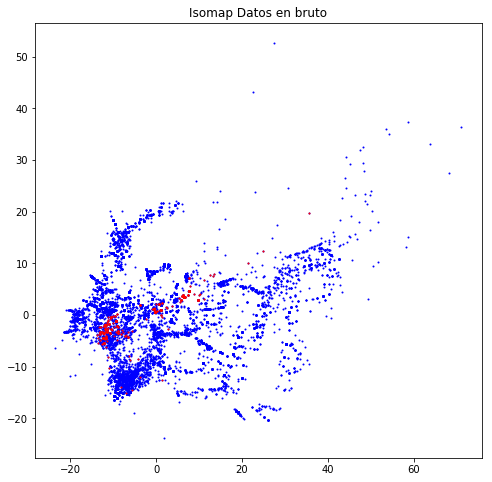

In [17]:
plt.figure(figsize=(8,8))

x = isomap2D[:,0]
y = isomap2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_Isomap]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(isomap2D[i,0], isomap2D[i,1], s=1, c='r')
plt.title("Isomap Datos en bruto")

### - Datos Estadísticos: 

In [18]:
#particionar datos:
tam_particion_IsomapEst = 5

presionesEstadisticasIsomap = presionesEstadisticas.iloc[0::tam_particion_IsomapEst,:]
print(len(presionesEstadisticasIsomap))
presionesEstadisticasIsomap.head()

23628


,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975683,0.056407,0.529248,0.550139,0.681058,0.529248,0.278552,0.157539,0.132922,0.179977,0.235920,0.231353,0.074451
1975689,0.057799,0.525070,0.559889,0.690808,0.533426,0.274373,0.149320,0.139086,0.154430,0.180803,0.173049,0.057790
1975693,0.055710,0.518802,0.562674,0.699164,0.545265,0.277855,0.143572,0.142360,0.143403,0.155548,0.146982,0.055026
1975700,0.078691,0.504875,0.550836,0.705432,0.544568,0.273677,0.134296,0.103632,0.104364,0.158548,0.148039,0.046569


In [19]:
iso = manifold.Isomap(n_neighbors=10, n_components=2)
isomap2D = iso.fit_transform(presionesEstadisticasIsomap)

In [20]:
#guardar resultados
with open('isoDE.pdd','wb') as f:
    pk.dump(isomap2D,f)

In [21]:
#cargar datos 
with open('isoDE.pdd','rb') as f: 
    isomap2D = pk.load(f) 

Text(0.5, 1.0, 'Isomap Datos Estadísticos')

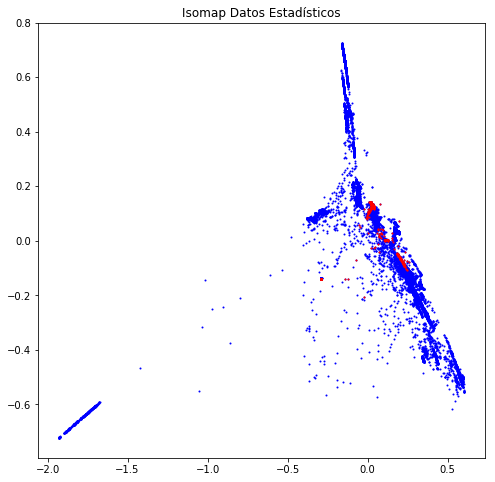

In [22]:
plt.figure(figsize=(8,8))

x = isomap2D[:,0]
y = isomap2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_IsomapEst]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(isomap2D[i,0], isomap2D[i,1], s=1, c='r')
plt.title("Isomap Datos Estadísticos")

## Locally Linear Embedding (LLE)

### Datos en Bruto: 

In [13]:
#Particionar datos: 
tam_particion_LLE = 5

presionesLLE = presiones.iloc[0::tam_particion_LLE,:]
print(len(presionesLLE))
presionesLLE.head()

23628


,P1,P2,P3,P4,P5,P6
1975678,0.000000,30.693069,36.633663,46.534653,37.623764,17.821783
1975683,6.930693,28.712872,30.693069,38.613861,29.702971,14.851485
1975689,5.940594,27.722773,30.693069,38.613861,29.702971,14.851485
1975693,5.940594,29.702971,29.702971,38.613861,31.683168,15.841584
1975700,5.940594,27.722773,31.683168,42.574257,30.693069,14.851485


In [14]:
lle = manifold.LocallyLinearEmbedding(n_neighbors= 10, n_components=2, eigen_solver='dense')
lle2D = lle.fit_transform(presionesLLE)

In [15]:
#guardar resultados
with open('lleDB.pdd','wb') as f:
    pk.dump(lle2D,f)

In [16]:
#cargar datos 
with open('lleDB.pdd','rb') as f: 
    lle2D = pk.load(f) 

Text(0.5, 1.0, 'LLE Datos en bruto')

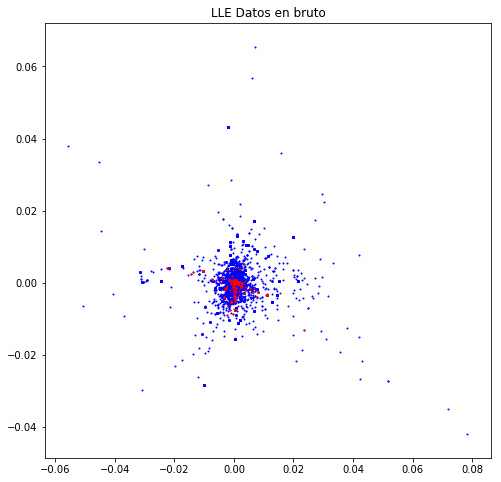

In [17]:
plt.figure(figsize=(8,8))

x = lle2D[:,0]
y = lle2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_LLE]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(lle2D[i,0], lle2D[i,1], s=1, c='r')
plt.title("LLE Datos en bruto")

### - Datos Estadísticos: 

In [18]:
#particionar datos:
tam_particion_LLEEst = 5

presionesEstadisticasLLE = presionesEstadisticas.iloc[0::tam_particion_LLEEst,:]
print(len(presionesEstadisticasLLE))
presionesEstadisticasLLE.head()

23628


,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975683,0.056407,0.529248,0.550139,0.681058,0.529248,0.278552,0.157539,0.132922,0.179977,0.235920,0.231353,0.074451
1975689,0.057799,0.525070,0.559889,0.690808,0.533426,0.274373,0.149320,0.139086,0.154430,0.180803,0.173049,0.057790
1975693,0.055710,0.518802,0.562674,0.699164,0.545265,0.277855,0.143572,0.142360,0.143403,0.155548,0.146982,0.055026
1975700,0.078691,0.504875,0.550836,0.705432,0.544568,0.273677,0.134296,0.103632,0.104364,0.158548,0.148039,0.046569


In [19]:
lle = manifold.LocallyLinearEmbedding(n_neighbors= 10, n_components=2, eigen_solver='dense')
lle2D = lle.fit_transform(presionesEstadisticasLLE)

In [20]:
#guardar resultados
with open('lleDE.pdd','wb') as f:
    pk.dump(lle2D,f)

In [21]:
#cargar datos 
with open('lleDE.pdd','rb') as f: 
    lle2D = pk.load(f) 

Text(0.5, 1.0, 'LLE Datos Estadísticos')

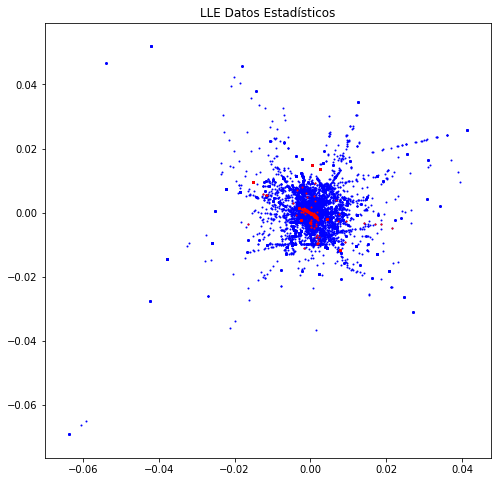

In [23]:
plt.figure(figsize=(8,8))

x = lle2D[:,0]
y = lle2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_LLEEst]

plt.scatter(x,y, s=1, c='b')

for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(lle2D[i,0], lle2D[i,1], s=1, c='r')
plt.title("LLE Datos Estadísticos")

## Modified Locally Linear Embedding (MLLE)

### - Datos en Bruto: 

In [24]:
#Particionar datos: 
tam_particion_MLLE = 8

presionesMLLE = presiones.iloc[0::tam_particion_MLLE,:]
print(len(presionesMLLE))
presionesMLLE.head()

14767


,P1,P2,P3,P4,P5,P6
1975678,0.000000,30.693069,36.633663,46.534653,37.623764,17.821783
1975687,5.940594,27.722773,30.693069,38.613861,29.702971,15.841584
1975694,8.910892,31.683168,30.693069,35.643566,23.762377,12.871287
1975702,6.930693,27.722773,30.693069,40.594059,29.702971,14.851485
1975710,6.930693,28.712872,31.683168,41.584160,28.712872,14.851485


In [25]:
mlle = manifold.LocallyLinearEmbedding(n_neighbors = 5, n_components=2, eigen_solver='dense', method='modified')
mlle2D = mlle.fit_transform(presionesMLLE)

/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:419: RuntimeWarning: divide by zero encountered in true_divide
  tmp[:, :nev] /= evals + reg[:, None]
/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:429: RuntimeWarning: divide by zero encountered in true_divide
  rho = evals[:, n_components:].sum(1) / evals[:, :n_components].sum(1)
/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:429: RuntimeWarning: invalid value encountered in true_divide
  rho = evals[:, n_components:].sum(1) / evals[:, :n_components].sum(1)
/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:437: RuntimeWarning: divide by zero encountered in true_divide
  eta_range = evals_cumsum[

In [26]:
#guardar resultados
with open('mlleDB.pdd','wb') as f:
    pk.dump(mlle2D,f)

In [27]:
#cargar datos 
with open('mlleDB.pdd','rb') as f: 
    mlle2D = pk.load(f) 

Text(0.5, 1.0, 'MLLE Datos en bruto')

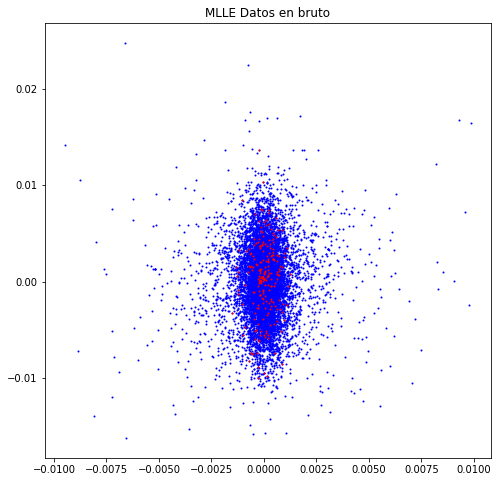

In [29]:
plt.figure(figsize=(8,8))

x = mlle2D[:,0]
y = mlle2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_MLLE]

for i in range(len(x)): 
    if x[i] < 0.01 and x[i]>-0.01 and y[i]<0.025 and y[i] >-0.025: 
        plt.scatter(mlle2D[i,0], mlle2D[i,1], s=1, c='b')

#plt.scatter(x,y, s=1, c='b')

for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mlle2D[i,0], mlle2D[i,1], s=1, c='r')
plt.title("MLLE Datos en bruto")

### - Datos Estadísticos: 

In [13]:
#particionar datos:
tam_particion_MLLEEst = 5

presionesEstadisticasMLLE = presionesEstadisticas.iloc[0::tam_particion_MLLEEst,:]
print(len(presionesEstadisticasMLLE))
presionesEstadisticasMLLE.head()

23628


,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975683,0.056407,0.529248,0.550139,0.681058,0.529248,0.278552,0.157539,0.132922,0.179977,0.235920,0.231353,0.074451
1975689,0.057799,0.525070,0.559889,0.690808,0.533426,0.274373,0.149320,0.139086,0.154430,0.180803,0.173049,0.057790
1975693,0.055710,0.518802,0.562674,0.699164,0.545265,0.277855,0.143572,0.142360,0.143403,0.155548,0.146982,0.055026
1975700,0.078691,0.504875,0.550836,0.705432,0.544568,0.273677,0.134296,0.103632,0.104364,0.158548,0.148039,0.046569


In [16]:
mlle = manifold.LocallyLinearEmbedding(n_neighbors = 5, n_components=2, eigen_solver='dense', method='modified')
mlle2D = mlle.fit_transform(presionesEstadisticasMLLE)

/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:429: RuntimeWarning: divide by zero encountered in true_divide
  rho = evals[:, n_components:].sum(1) / evals[:, :n_components].sum(1)
/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:429: RuntimeWarning: invalid value encountered in true_divide
  rho = evals[:, n_components:].sum(1) / evals[:, :n_components].sum(1)
/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:437: RuntimeWarning: divide by zero encountered in true_divide
  eta_range = evals_cumsum[:, -1:] / evals_cumsum[:, :-1] - 1
/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:437: RuntimeWarning: invalid value encountered in true_divide
  eta

In [17]:
#guardar resultados
with open('mlleDE.pdd','wb') as f:
    pk.dump(mlle2D,f)

In [18]:
#cargar datos 
with open('mlleDE.pdd','rb') as f: 
    mlle2D = pk.load(f)

Text(0.5, 1.0, 'MLLE Datos Estadísticos')

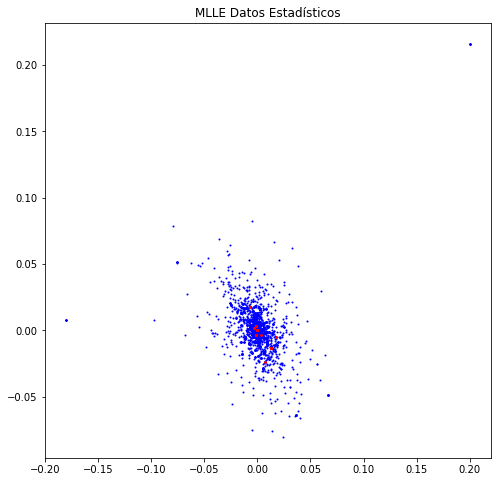

In [19]:
plt.figure(figsize=(8,8))

x = mlle2D[:,0]
y = mlle2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_MLLEEst]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mlle2D[i,0], mlle2D[i,1], s=1, c='r')
plt.title("MLLE Datos Estadísticos")

## Hessian Eigenmapping

### - Datos en bruto: 

In [20]:
#Particionar datos: 
tam_particion_HE = 8

presionesHE = presiones.iloc[0::tam_particion_HE,:]
print(len(presionesHE))
presionesHE.head()

14767


,P1,P2,P3,P4,P5,P6
1975678,0.000000,30.693069,36.633663,46.534653,37.623764,17.821783
1975687,5.940594,27.722773,30.693069,38.613861,29.702971,15.841584
1975694,8.910892,31.683168,30.693069,35.643566,23.762377,12.871287
1975702,6.930693,27.722773,30.693069,40.594059,29.702971,14.851485
1975710,6.930693,28.712872,31.683168,41.584160,28.712872,14.851485


In [21]:
he = manifold.LocallyLinearEmbedding(n_neighbors = 20, n_components=2, eigen_solver='dense', method='hessian')
he2D = he.fit_transform(presionesHE)

In [22]:
#guardar resultados
with open('heDB.pdd','wb') as f:
    pk.dump(he2D,f)

In [23]:
#cargar datos 
with open('heDB.pdd','rb') as f: 
    he2D = pk.load(f)

Text(0.5, 1.0, 'HE Datos en bruto')

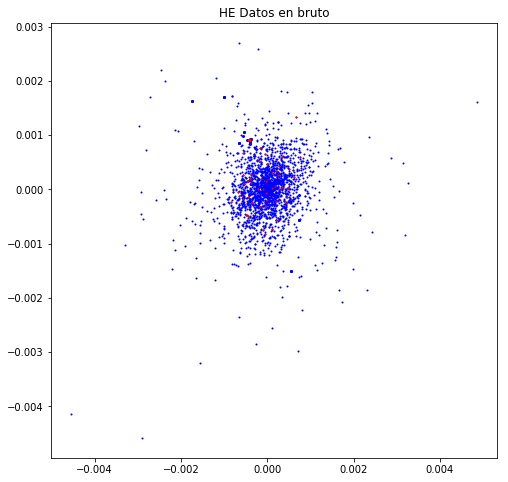

In [25]:
plt.figure(figsize=(8,8))

x = he2D[:,0]
y = he2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_HE]

for i in range(len(x)): 
    if x[i] < 0.005 and x[i]>-0.005 and y[i]<0.005 and y[i]>-0.005: 
        plt.scatter(he2D[i,0], he2D[i,1], s=1, c='b')

#plt.scatter(x,y, s=1, c='b')

for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(he2D[i,0], he2D[i,1], s=1, c='r')
plt.title("HE Datos en bruto")

### - Datos Estadísticos: 

In [25]:
#particionar datos:
tam_particion_HEEst = 8

presionesEstadisticasHE = presionesEstadisticas.iloc[0::tam_particion_HEEst,:]
print(len(presionesEstadisticasHE))
presionesEstadisticasHE.head()

14767


,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975687,0.054318,0.527159,0.559889,0.694986,0.539694,0.278552,0.151965,0.136471,0.156657,0.204707,0.211401,0.074451
1975694,0.061978,0.519499,0.563370,0.699164,0.543175,0.276462,0.149529,0.143379,0.142287,0.155548,0.156834,0.060770
1975702,0.096797,0.502786,0.553621,0.719359,0.550139,0.273677,0.100302,0.064905,0.081131,0.155012,0.152920,0.046569
1975710,0.113510,0.510446,0.561978,0.738858,0.553621,0.274373,0.032559,0.094651,0.106533,0.162305,0.151783,0.044203


In [26]:
he = manifold.LocallyLinearEmbedding(n_neighbors = 20, n_components=2, eigen_solver='dense', method='hessian')
he2D = he.fit_transform(presionesEstadisticasHE)

In [27]:
#guardar resultados
with open('heDE.pdd','wb') as f:
    pk.dump(he2D,f)

In [28]:
#cargar datos 
with open('heDE.pdd','rb') as f: 
    he2D = pk.load(f)

Text(0.5, 1.0, 'HE Datos Estadísticos')

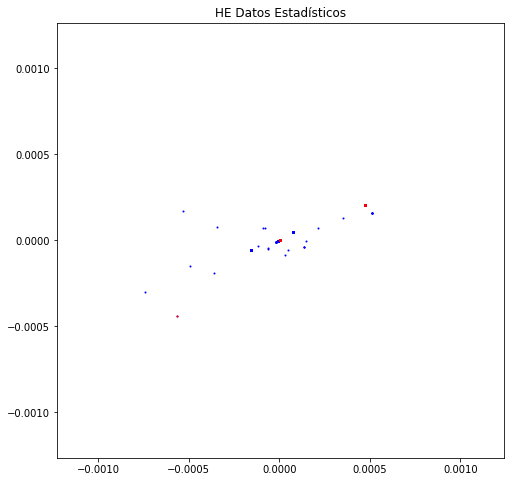

In [35]:
plt.figure(figsize=(8,8))

x = he2D[:,0]
y = he2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_HEEst]

for i in range(len(x)): 
    if x[i]>-0.001 and x[i]<0.001 and y[i]<0.002 and y[i]>-0.002: 
        plt.scatter(he2D[i,0], he2D[i,1], s=1, c='b')

#plt.scatter(x,y, s=1, c='b')

for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(he2D[i,0], he2D[i,1], s=1, c='r')
plt.title("HE Datos Estadísticos")
